In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.io import loadmat

In [2]:
# Load data
curvature_10 = loadmat('curvature_10.mat')
tau_M = loadmat('tau_M.mat')['tau_M'][0,1:]
Temperature = curvature_10['Temperature'][0]
t_MC = curvature_10['t_MC'][:,0]
mean_MC_T = curvature_10['mean_MC_T']
mean_GC_T = curvature_10['mean_GC_T']

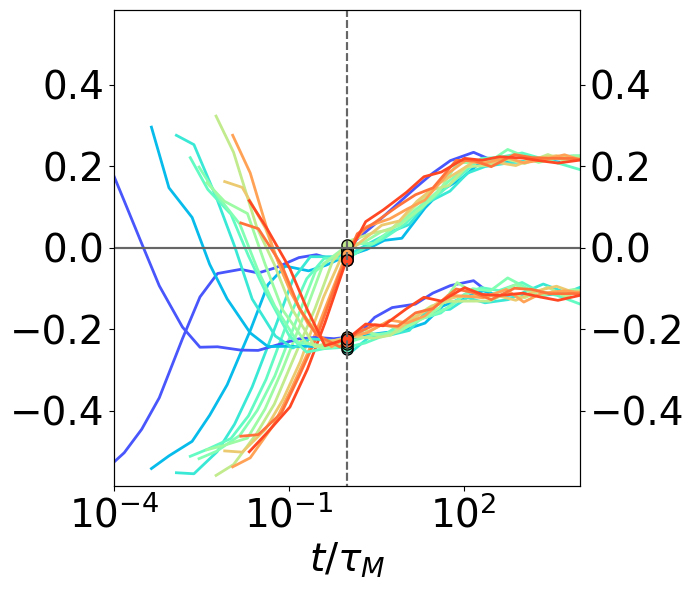

In [3]:
# Figures
color_rainbow = plt.cm.rainbow(np.linspace(0,1,100))[::-1]
color_viridis = plt.cm.viridis(np.linspace(0,1,100))[::-1]
index_color = np.round(0.44 / Temperature * 100).astype(int)
color_order = color_rainbow[index_color]

# fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.set_prop_cycle(color=color_order)

tau_T = 1. / np.sqrt(Temperature)

for i in range(len(Temperature)):
    ax1.plot(t_MC / tau_M[i], mean_MC_T[:,i], linewidth=2)

for i in range(len(Temperature)):
    F_tau = interp1d(t_MC, mean_MC_T[:,i], kind='linear')
    MC_tau_M = F_tau(tau_M[i])
    ax1.plot(tau_M[i]/tau_M[i], MC_tau_M, 'o', linewidth=2, markeredgecolor='k', markerfacecolor=color_order[i], markersize=8)

# susceptibility = loadmat('susceptibility_1.2_1.0.mat')
# tmax = susceptibility['tmax'][0]

# for i in range(len(Temperature)):
#     F_max = interp1d(t_MC, mean_MC_T[:,i], kind='linear')
#     MC_tmax = F_max(tmax[i])
#     ax1.plot(tmax[i]/tau_M[i], MC_tmax, '^', linewidth=2, markeredgecolor='k', markerfacecolor=color_order[i], markersize=8)

ax1.plot([1e-5, 1e5], [0, 0], '-', color='#666666')
ax1.plot([1, 1], [-1, 1], '--', color='#666666')

ax1.set_xscale('log')
ax1.set_xlim(10**-4, 10**4)
# ax1.set_xticks(10.0 ** np.arange(-10, 11, 2))
ax1.set_ylim([-0.5, 0.5])

ax1.set_xlabel(r'$t/\tau_{M}$', fontsize=28)

ax1.tick_params(axis='both', which='major', labelsize=28)

fig.set_size_inches(6, 6, forward=True)
fig.tight_layout()

ax2 = ax1.twinx()
ax2.set_prop_cycle(color=color_order)

for i in range(len(Temperature)):
    ax1.plot(t_MC / tau_M[i], mean_GC_T[:,i], linewidth=2)

for i in range(len(Temperature)):
    F_tau = interp1d(t_MC, mean_GC_T[:,i], kind='linear')
    MC_tau_M = F_tau(tau_M[i])
    ax2.plot(tau_M[i]/tau_M[i], MC_tau_M, 'o', linewidth=2, markeredgecolor='k', markerfacecolor=color_order[i], markersize=8)

# for i in range(len(Temperature)):
#     F_max = interp1d(t_MC, mean_GC_T[:,i], kind='linear')
#     MC_tmax = F_max(tmax[i])
#     ax2.plot(tmax[i]/tau_M[i], MC_tmax, '^', linewidth=2, markeredgecolor='k', markerfacecolor=color_order[i], markersize=8)

ax2.plot([1e-5, 1e5], [0, 0], '-', color='#666666')
ax2.plot([1, 1], [-1, 1], '--', color='#666666')

ax2.set_xscale('log')
ax2.set_xlim(10**-4, 10**4)
# ax2.set_xticks(10.0 ** np.arange(-10, 11, 2))
ax2.set_ylim([-0.5, 0.5])

ax2.set_xlabel(r'$t/\tau_{M}$', fontsize=28)

ax2.tick_params(axis='both', which='major', labelsize=28)

ax1.set_aspect(7)
ax2.set_aspect(7)

# plt.tight_layout()

plt.show()

In [4]:
Sigma_interp = loadmat('Sigma_interp.mat')
C_c_interp = Sigma_interp['C_c_interp']

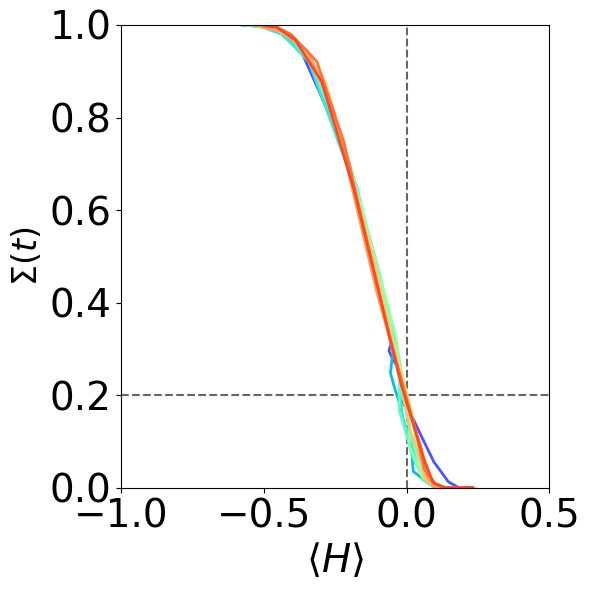

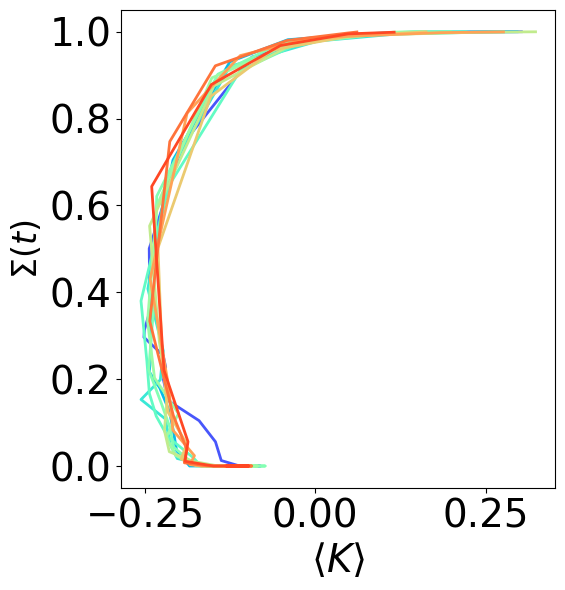

In [6]:
# Figures_H
# linecolor
index_color = np.round(0.44 / Temperature * 100).astype(int)
color_order = color_rainbow[index_color]

fig1, ax1 = plt.subplots()
ax1.set_prop_cycle(color=color_order)

tau_M = loadmat('tau_M.mat')['tau_M'][1:]
tau_T = 1. / np.sqrt(3 * Temperature)

ax1.plot([0, 0], [0, 1], '--', color='#666666')
ax1.plot([-1, 0.5], [0.2, 0.2], '--', color='#666666')

for i in range(len(Temperature)):
    ax1.plot(mean_MC_T[:,i], C_c_interp[:,i], color=color_order[i], linewidth=2)

ax1.set_ylim([0, 1])
ax1.set_xlim([-1, 0.5])

ax1.set_xlabel(r'$\langle H\rangle$', fontsize=28)
ax1.set_ylabel(r'$\Sigma(t)$', fontsize=24)

ax1.tick_params(axis='both', which='major', labelsize=28)

fig1.set_size_inches(6, 6, forward=True)
fig1.tight_layout()

# Figures_K

fig2, ax2 = plt.subplots()
ax2.set_prop_cycle(color=color_order)

for i in range(len(Temperature)):
    ax2.plot(mean_GC_T[:,i], C_c_interp[:,i], color=color_order[i], linewidth=2)

ax2.set_xlabel(r'$\langle K\rangle$', fontsize=28)
ax2.set_ylabel(r'$\Sigma(t)$', fontsize=24)

ax2.tick_params(axis='both', which='major', labelsize=28)

fig2.set_size_inches(6, 6, forward=True)
fig2.tight_layout()

plt.show()